In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
import plotly.express as px

Config

In [2]:
plotly = True
matplotlib = True

# number of gaussians to fit
n_components = 2

# bins for histogram
bins = 50

Data Reading

In [4]:
# df = pd.read_csv( str(snakemake.input), sep="\t" )
df = pd.read_csv("/data/users/noahkleinschmidt/genome_annotation/dupgen/pacbio/canu/duplicates/cvi.synteny.blocks.ks.info", sep="\t" )
df

Blocks ID                                       Location  Block Size  \
0    Alignment127  canu-tig00000062_pilon&canu-tig00000329_pilon           6   
1     Alignment32  canu-tig00000010_pilon&canu-tig00000151_pilon          15   
2     Alignment90  canu-tig00000029_pilon&canu-tig00000259_pilon           6   
3    Alignment206  canu-tig00000727_pilon&canu-tig00000731_pilon          10   
4    Alignment118  canu-tig00000056_pilon&canu-tig00000768_pilon          11   
..            ...                                            ...         ...   
230  Alignment169  canu-tig00000128_pilon&canu-tig00000140_pilon           6   
231  Alignment164  canu-tig00000107_pilon&canu-tig00000270_pilon           7   
232  Alignment132  canu-tig00000064_pilon&canu-tig00000291_pilon           7   
233  Alignment196  canu-tig00000725_pilon&canu-tig00000726_pilon           7   
234  Alignment171  canu-tig00000129_pilon&canu-tig00000729_pilon          13   

     Average Ks       e-value  Score Orientation  
0      0.972600  1.300000e-08  288.0       minus  
1      1.266908  8.500000e-38  686.0        plus  
2      1.009520  9.300000e-10  292.0       minus  
3      0.007450  2.400000e-19  497.0       minus  
4      1.157322  6.700000e-22  529.0       minus  
..          ...           ...    ...         ...  
230    1.738900  7.000000e-08  263.0        plus  
231    0.885140  1.400000e-11  319.0       minus  
232    1.437486  1.100000e-10  331.0       minus  
233    0.000000  2.900000e-07  348.0        plus  
234    0.000000  3.900000e-29  649.0       minus  

[235 rows x 7 columns]

Fitting gaussian mixture model

In [23]:
values = df[["Average Ks"]]
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(values)

GaussianMixture(n_components=2, random_state=0)

In [24]:
# get means and stds
m1, m2 = gmm.means_.flatten()
s1, s2 = gmm.covariances_.flatten()

In [25]:
# generate histogram data
hist = np.histogram(values, bins=bins)

In [26]:
def gauss(x, mu, sigma, A):
    """Gaussian function"""
    return A * np.exp( -(x-mu)**2 / 2 / sigma**2 )

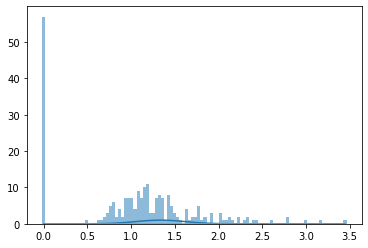

In [30]:
plt.bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0], alpha=0.5, label="data")
plt.plot(hist[1][:-1], gauss(hist[1][:-1], m1, s1, 1), label="data")
plt.plot(hist[1][:-1], gauss(hist[1][:-1], m2, s2, 1), label="data")

Generate a plotly chart

In [ ]:
if plotly:
    pfig = px.pie(  df, values = df.values[0], names = df.columns, title = "STAR mapping stats" )
    pfig.write_html(snakemake.output.html)
    pfig.show()

Generate a matplotlib chart

In [ ]:
if matplotlib:
    fig, ax = plt.subplots()
    ax.pie( df.values[0], labels = df.columns, autopct = '%1.1f%%', shadow = True, startangle = 90 )
    fig.savefig(snakemake.output.png, transparent=True)
    plt.show()